In [4]:
import pandas as pd
import numpy as np
from X import datasets
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [70]:
X, y = datasets.make_blobs(n_samples=200, random_state=4, centers=2, cluster_std=2)
X[:5], y[:5]

(array([[ 9.82093984,  4.69205788],
        [12.10253304, -2.99886117],
        [11.83841725,  1.90619576],
        [ 9.42348287,  2.11197664],
        [ 9.22668298,  0.15348652]]),
 array([1, 0, 1, 1, 1]))

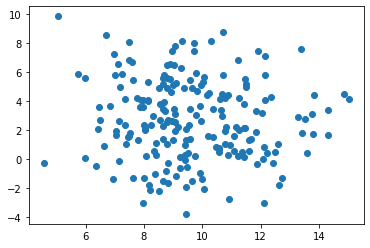

In [71]:
# plt.scatter(X[:,:1], X[:, 1:])
plt.scatter(X[:,0], X[:, 1])

In [72]:
def get_class_colour(class_label):
    return 'green' if class_label else 'blue'

In [78]:
def plot_points(X, y, new_points=None, new_prediction=None, nearest_points=None, file_name=None):
    plt.figure(figsize=(8, 8))
    plt.scatter(X[:, 0], X[:, 1], c=[get_class_colour(y_i) for y_i in y], s=100, edgecolor='black', alpha=0.3)
    
    if new_points is not None:
        plt.scatter(new_points[:, 0], new_points[:, 1], c='black', s=100, edgecolor='black')
    
    if new_prediction is not None:
        plt.scatter(new_points[:, 0], new_points[:, 1], c=[get_class_colour(y_i) for y_i in new_prediction], s=100, edgecolor='black')
        
    if nearest_points is not None:
        plt.scatter(nearest_points[:, 0], nearest_points[:, 1], c='red', s=100, edgecolor='black')
    

    plt.xlabel("x1 (feature)")
    plt.ylabel("x2 (feature)")
    
    if file_name:
        plt.savefig(filename)

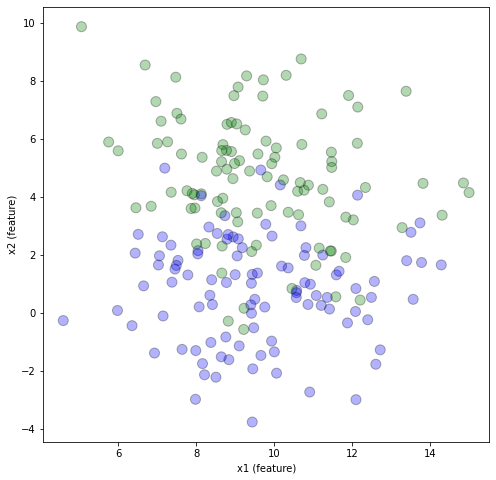

In [79]:
plot_points(X, y)

In [80]:
X_new = np.array([[12, 6]])

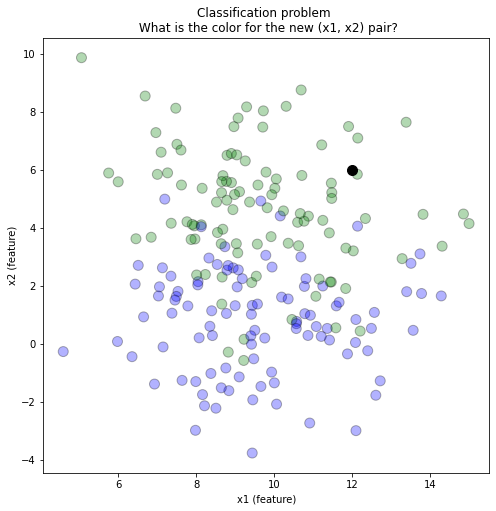

In [77]:
plot_points(X, y, new_points=X_new)

In [81]:
from scipy.spatial.distance import euclidean

def find_nearest_point_index(x_new, X):
    d_min = euclidean(x_new, X[0])
    min_idx = 0
    for idx in range(1, X.shape[0]):
        d = euclidean(x_new, X[idx])
        if d < d_min:
            d_min = d
            min_idx = idx
    return min_idx

min_idx = find_nearest_point_index(X_new, X)

In [83]:
min_idx

67

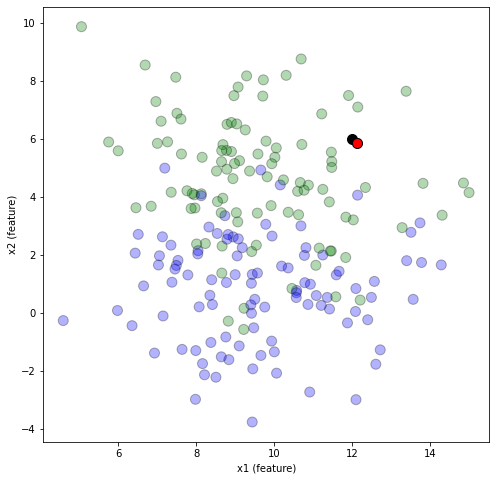

In [86]:
plot_points(X, y, new_points=X_new, nearest_points=X[[min_idx]])